# Canny Edge Detection:

Canny Edge Detection is a popular edge detection algorithm. I

1. It is a multi-stage algorithm and we will go through each stages.

2. Noise Reduction

Since edge detection is susceptible to noise in the image, first step is to remove the noise in the image with a 5x5 Gaussian filter. 

3. Finding Intensity Gradient of the Image

Smoothened image is then filtered with a Sobel kernel in both horizontal and vertical direction to get first derivative in horizontal direction ( Gx) and vertical direction ( Gy). From these two images, we can find edge gradient and direction for each pixel as follows:


Edge_Gradient(G)=G2x+G2y−−−−−−−

√Angle(θ)=tan−1(GyGx)

Gradient direction is always perpendicular to edges. It is rounded to one of four angles representing vertical, horizontal and two diagonal directions.

4. Non-maximum Suppression

After getting gradient magnitude and direction, a full scan of image is done to remove any unwanted pixels which may not constitute the edge. For this, at every pixel, pixel is checked if it is a local maximum in its neighborhood in the direction of gradient. 

5. Hysteresis Thresholding

This stage decides which are all edges are really edges and which are not. For this, we need two threshold values, minVal and maxVal. Any edges with intensity gradient more than maxVal are sure to be edges and those below minVal are sure to be non-edges, so discarded. Those who lie between these two thresholds are classified edges or non-edges based on their connectivity. If they are connected to "sure-edge" pixels, they are considered to be part of edges. Otherwise, they are also discarded.

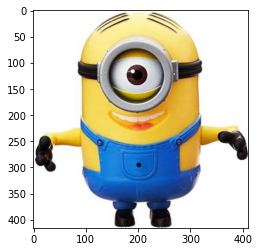

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Read in the image
image = cv2.imread('Emob.jpeg')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

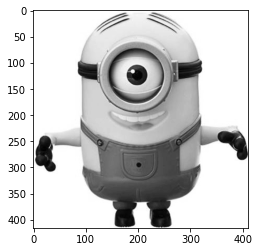

In [7]:
# Convert the image to grayscale for processing
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')

### Implement Canny edge detection

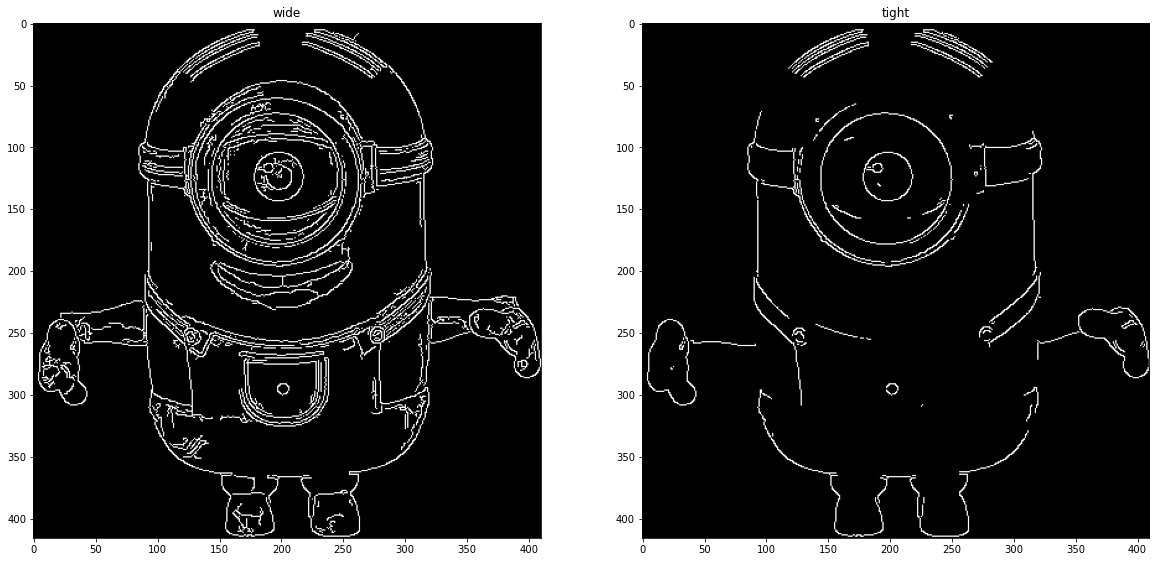

In [8]:
# Try Canny using "wide" and "tight" thresholds

wide = cv2.Canny(gray, 20, 110)
tight = cv2.Canny(gray, 300, 340)
 
    
# Display the images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title('wide')
ax1.imshow(wide, cmap='gray')

ax2.set_title('tight')
ax2.imshow(tight, cmap='gray')

### TODO: Try to find the edges of this flower

Set a small enough threshold to isolate the boundary of the flower.

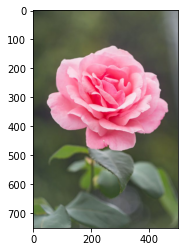

In [11]:
# Read in the image
image = cv2.imread('rose.jpeg')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

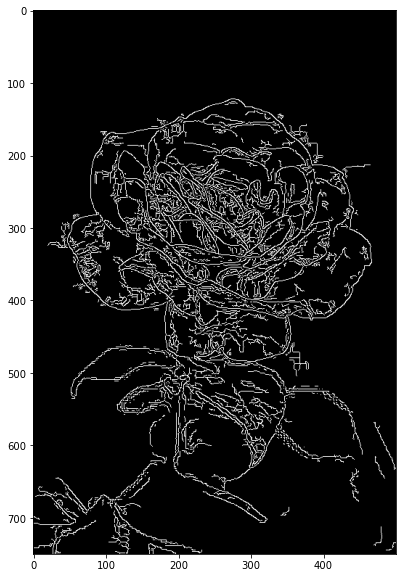

In [12]:
# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

## TODO: Define lower and upper thresholds for hysteresis
# right now the threshold is so small and low that it will pick up a lot of noise
lower = 0
upper = 50

edges = cv2.Canny(gray, lower, upper)

plt.figure(figsize=(20,10))
plt.imshow(edges, cmap='gray')